In [795]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn import linear_model
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import r2_score
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
from pylab import rcParams
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

In [796]:
import warnings
warnings.filterwarnings("ignore")

The Inter-American Development Bank is asking the Kaggle community for help with income qualification for some of the world's poorest families. Are you up for the challenge?

Here's the backstory: Many social programs have a hard time making sure the right people are given enough aid. It’s especially tricky when a program focuses on the poorest segment of the population. The world’s poorest typically can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, one popular method uses an algorithm to verify income qualification. It’s called the Proxy Means Test (or PMT). With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling, or the assets found in the home to classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

To improve on PMT, the IDB (the largest source of development financing for Latin America and the Caribbean) has turned to the Kaggle community. They believe that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.

Beyond Costa Rica, many countries face this same problem of inaccurately assessing social need. If Kagglers can generate an improvement, the new algorithm could be implemented in other countries around the world.

## Importing datasets

In [877]:
costa_train = pd.read_csv('../data/train.csv')

In [879]:
costa_test = pd.read_csv('../data/test.csv')

In [878]:
len(costa_train)

9557

In [880]:
len(costa_test)

23856

In [881]:
costa_train.head(10)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,121,1444,16,121,4,1.777778,1.0,121.0,1444,4
6,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,0,...,4,64,16,121,4,1.777778,1.0,121.0,64,4
7,ID_3e04e571e,130000.0,1,2,0,1,1,0,NaN,0,...,0,49,16,81,4,16.000000,1.0,100.0,49,4
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,NaN,0,...,81,900,16,81,4,16.000000,1.0,100.0,900,4
9,ID_51f52fdd2,130000.0,1,2,0,1,1,0,NaN,0,...,121,784,16,81,4,16.000000,1.0,100.0,784,4


The file is a set of household characteristics from a representative sample of Costa Rican Households. The dataset has observations for each member of the household but the classification is done at the household level. That is, households cannot have two different classifications. Data is not presented at the household level so that participants can create their own household features from individual data.

In [800]:
costa_sample = pd.read_csv('../data/sample_submission.csv')
costa_sample.head()

,Id,Target
0,ID_2f6873615,4
1,ID_1c78846d2,4
2,ID_e5442cf6a,4
3,ID_a8db26a79,4
4,ID_a62966799,4


In [882]:
costa_train.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
v14a                 int64
refrig               int64
v18q                 int64
v18q1              float64
r4h1                 int64
r4h2                 int64
r4h3                 int64
r4m1                 int64
r4m2                 int64
r4m3                 int64
r4t1                 int64
r4t2                 int64
r4t3                 int64
tamhog               int64
tamviv               int64
escolari             int64
rez_esc            float64
hhsize               int64
paredblolad          int64
paredzocalo          int64
paredpreb            int64
pareddes             int64
paredmad             int64
paredzinc            int64
paredfibras          int64
                    ...   
bedrooms             int64
overcrowding       float64
tipovivi1            int64
tipovivi2            int64
tipovivi3            int64
tipovivi4            int64
t

Response variable = 'Target'

In [883]:
costa_train['Target'].unique()

array([4, 2, 3, 1])

### Ditching 'Id' column

In [884]:
costa_train = costa_train.drop(columns=['Id'])

In [885]:
costa_test = costa_test.drop(columns=['Id'])


### Looking for missing values

In [886]:
len(costa_train)

9557

In [887]:
null_cols = costa_train.isna().sum()/len(costa_train)

null_cols[null_cols > 0]

v2a1         0.717798
v18q1        0.768233
rez_esc      0.829549
meaneduc     0.000523
SQBmeaned    0.000523
dtype: float64

In [888]:
drop_cols = list(null_cols[null_cols > 0.70].index) # removing columns with > 70% NAs
costa_train = costa_train.drop(drop_cols, axis=1)

In [889]:
costa_test = costa_test.drop(drop_cols, axis=1)

In [890]:
null_cols = costa_train.isna().sum()
null_cols[null_cols > 0]

meaneduc     5
SQBmeaned    5
dtype: int64

In [891]:
costa_train.dropna(inplace=True)

In [811]:
#costa_test.dropna(inplace=True)

### Looking for multicollinearity


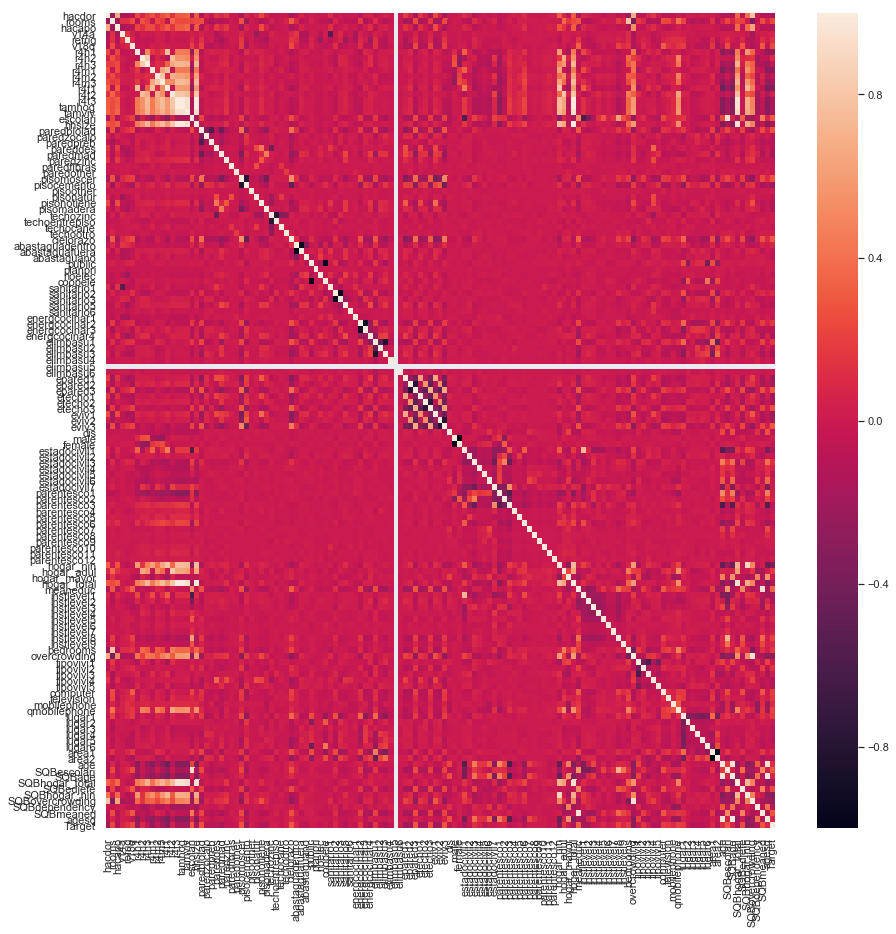

In [892]:
rcParams['figure.figsize'] = 15, 15
corr = costa_train.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [893]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
to_drop

['tamhog',
 'tamviv',
 'hhsize',
 'hogar_total',
 'SQBescolari',
 'SQBage',
 'SQBhogar_total',
 'SQBovercrowding',
 'SQBmeaned',
 'agesq']

'SQBage' is age squared so it makes sense that it is highly correlated with 'agesq'
'tamhog' is size of the household, so it is identical with 'hhsize', household size == 'tamviv' == 'hogar_total'.
'SQBhogar_total' is hogar_total squared, so it is highly correlated with 'hogar_total'.
'SQBmeaned', square of the mean years of education of adults (>=18) in the household == 'SQBescolari', escolari squared
'hhsize' is highly correlated with 'r4t3', Total persons in the household (cf. correlation matrix)

In [894]:
costa_train = costa_train.drop(columns=to_drop)

In [895]:
costa_test = costa_test.drop(columns=['tamhog',
 'tamviv',
 'hhsize',
 'hogar_total',
 'SQBescolari',
 'SQBage',
 'SQBhogar_total',
 'SQBovercrowding',
 'SQBmeaned',
 'agesq'])

In [896]:
corr = costa_train.corr()
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
to_drop

[]

### Taking care of object columns

In [897]:
costa_train.select_dtypes(include=['object']).head(10)

,idhogar,dependency,edjefe,edjefa
0,21eb7fcc1,no,10,no
1,0e5d7a658,8,12,no
2,2c7317ea8,8,no,11
3,2b58d945f,yes,11,no
4,2b58d945f,yes,11,no
5,2b58d945f,yes,11,no
6,2b58d945f,yes,11,no
7,d6dae86b7,yes,9,no
8,d6dae86b7,yes,9,no
9,d6dae86b7,yes,9,no


* dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
* edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
* edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

In [898]:
costa_train['edjefa'].unique()

array(['no', '11', '4', '10', '9', '15', '7', '14', '13', '8', '17', '6',
       '5', '3', '16', '19', 'yes', '21', '12', '2', '20', '18'],
      dtype=object)

In [899]:
### Changing 'edjefa' column values to '0' and '1' for Train and Test

In [900]:
costa_train.loc[costa_train['edjefa'].str.contains('[0-9]', regex=True), 'edjefa'] = '1'

In [901]:
costa_train.loc[costa_train['edjefa'].str.contains('yes', regex=True), 'edjefa'] = '1'

In [902]:
costa_train.loc[costa_train['edjefa'].str.contains('no', regex=True), 'edjefa'] = '0'

In [903]:
costa_test.loc[costa_test['edjefa'].str.contains('[0-9]', regex=True), 'edjefa'] = '1'
costa_test.loc[costa_test['edjefa'].str.contains('no', regex=True), 'edjefa'] = '0'
costa_test.loc[costa_test['edjefa'].str.contains('yes', regex=True), 'edjefa'] = '1'

In [904]:
costa_train['edjefa'].unique()

array(['0', '1'], dtype=object)

In [905]:
costa_test['edjefa'].unique()

array(['1', '0'], dtype=object)

In [906]:
### Doing the same for 'edjefe'

In [907]:
costa_train['edjefe'].unique()

array(['10', '12', 'no', '11', '9', '15', '4', '6', '8', '17', '7', '16',
       '14', '5', '21', '2', '19', 'yes', '3', '18', '13', '20'],
      dtype=object)

In [908]:
costa_train.loc[costa_train['edjefe'].str.contains('[0-9]', regex=True), 'edjefe'] = '1'

In [909]:
costa_train.loc[costa_train['edjefe'].str.contains('yes', regex=True), 'edjefe'] = '1'
costa_train.loc[costa_train['edjefe'].str.contains('no', regex=True), 'edjefe'] = '0'

In [910]:
costa_test.loc[costa_test['edjefe'].str.contains('[0-9]', regex=True), 'edjefe'] = '1'
costa_test.loc[costa_test['edjefe'].str.contains('yes', regex=True), 'edjefe'] = '1'
costa_test.loc[costa_test['edjefe'].str.contains('no', regex=True), 'edjefe'] = '0'

In [911]:
costa_train['edjefe'].unique()
costa_test['edjefe'].unique()


array(['0', '1'], dtype=object)

In [912]:
### Dropping out Dependency column

In [913]:
costa_train['dependency'].unique()

array(['no', '8', 'yes', '3', '.5', '.25', '2', '.66666669', '.33333334',
       '1.5', '.40000001', '.75', '1.25', '.2', '2.5', '1.2', '4',
       '1.3333334', '2.25', '.22222222', '5', '.83333331', '.80000001',
       '6', '3.5', '1.6666666', '.2857143', '1.75', '.71428573',
       '.16666667', '.60000002'], dtype=object)

In [914]:
costa_train['dependency'].value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             373
.25           260
3             236
4             100
.75            98
.2             90
.40000001      84
1.3333334      84
2.5            77
5              24
1.25           18
.80000001      18
3.5            18
2.25           13
.71428573      12
1.2            11
.83333331      11
.22222222      11
1.75           11
.2857143        9
.60000002       8
1.6666666       8
.16666667       7
6               7
Name: dependency, dtype: int64

'Yes' and 'no' are too many in 'Dependency' column and we can't imagine 'yes' values

In [915]:
costa_train = costa_train.drop(columns=['dependency'])

In [916]:
costa_test = costa_test.drop(columns=['dependency'])

### Response variable : 'Target'

In [917]:
costa_train.Target.value_counts()

4    5991
2    1597
3    1209
1     755
Name: Target, dtype: int64

Text(0.5, 1.0, 'Counts of each Poverty level')

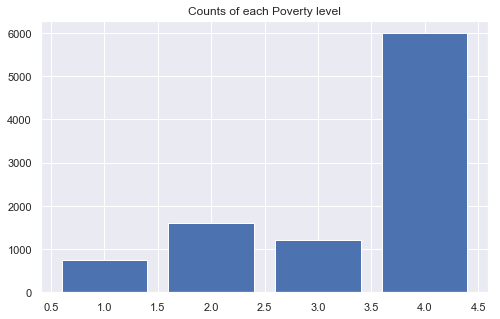

In [918]:
rcParams['figure.figsize'] = 8, 5

plt.bar(costa_train.Target.unique(), costa_train.Target.value_counts())
plt.title('Counts of each Poverty level')


### Appending Train and Test data ? (not used)

In [610]:
data = costa_train.append(costa_test, ignore_index = True, sort=False)

In [611]:
data.head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,lugar4,lugar5,lugar6,area1,area2,age,SQBedjefe,SQBhogar_nin,SQBdependency,Target
0,0,3,0,1,1,0,0,1,1,0,...,0,0,0,1,0,43,100,0,0.0,4.0
1,0,4,0,1,1,1,0,1,1,0,...,0,0,0,1,0,67,144,0,64.0,4.0
2,0,8,0,1,1,0,0,0,0,0,...,0,0,0,1,0,92,0,0,64.0,4.0
3,0,5,0,1,1,1,0,2,2,1,...,0,0,0,1,0,17,121,4,1.0,4.0
4,0,5,0,1,1,1,0,2,2,1,...,0,0,0,1,0,37,121,4,1.0,4.0


### Household identifier and different Target for same household

* idhogar - this is a unique identifier for each household. This can be used to create household-wide features, etc. All rows in a given household will have a matching value for this identifier.

* parentesco1 - indicates if this person is the head of the household.

In [919]:
# Groupby the household and count nb of unique values. 
#It should be == 1 because every household members should have the same Target

sameTarget = costa_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

sameTarget.head()

idhogar
001ff74ca    True
003123ec2    True
004616164    True
004983866    True
005905417    True
Name: Target, dtype: bool

In [920]:
# Households where targets are not the same

diffTarget = sameTarget[sameTarget == False]

len(diffTarget)

85

There are 85 households where members don't have the same Target.

correct label is that for the head of household (parentesco1 == 1)

In [921]:
print(diffTarget[[0]])
costa_train[['idhogar', 'parentesco1', 'Target']][costa_train['idhogar'] == '0172ab1d9']

idhogar
0172ab1d9    False
Name: Target, dtype: bool


,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [922]:
""" 
Assigning new target values to every members in a same household

"""

for i in range(len(diffTarget)):
    #print(diffTarget[[i]].index[0])
    newtarget = costa_train['Target'][(costa_train['idhogar'] == diffTarget[[i]].index[0]) & (costa_train['parentesco1'] == 1)]
    #print(int(newtarget))
    costa_train['Target'][costa_train['idhogar'] == diffTarget[[i]].index[0]] = int(newtarget)
    
    #print(costa_train['Target'][costa_train['idhogar'] == diffTarget[[i]].index[0]])
    


In [923]:
## checking if all is ok
print(diffTarget[[0]])
costa_train[['idhogar', 'parentesco1', 'Target']][costa_train['idhogar'] == '0172ab1d9']

idhogar
0172ab1d9    False
Name: Target, dtype: bool


,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,3
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,3


In [925]:
### Number of heads of households

In [924]:
#head_household = costa_train.loc[costa_train['parentesco1'] == 1, :]
#head_household.shape

In [926]:
# 2970 heads of households

### Data is already splitted in training set and testing set

Main table is broken into two files for Train (with a Target column) and Test (without the Target column).

In [927]:
len(costa_test)*100/(len(costa_test)+len(costa_train))

71.4080459770115

Train = 29% ; Test (without 'Target') = 71%

### Splitting "Train" to training (80%) and testing sets (20%) 

In [928]:
y = costa_train['Target']
X = costa_train[[col for col in costa_train.columns if (col != 'Target') & (col != 'idhogar')]]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [929]:
print(X_train.shape)
print(y_train.shape)

(7641, 126)
(7641,)


In [930]:
print(X_test.shape)
print(y_test.shape)

(1911, 126)
(1911,)


### Model results

In [623]:
model_accuracies = pd.DataFrame()

model_accuracies = pd.DataFrame(columns = ['model', 'accuracy', 'mean F1 score'])


### Random Forest classification


In [624]:

costa_rf = RandomForestClassifier()
costa_rf.fit(X_train, y_train)

y_pred_test_rf = costa_rf.predict(X_test)

print('Confusion matrix \n', confusion_matrix(y_test, y_pred_test_rf), '\n')
print('Accuracy score', accuracy_score(y_test, y_pred_test_rf))

model_accuracies = model_accuracies.append({'model': 'RF', 
                                            'accuracy': accuracy_score(y_test, y_pred_test_rf),
                                            'mean F1 score': np.mean(f1_score(y_test, y_pred_test_rf, average=None))},ignore_index=True)

print('balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred_test_rf), '\n')

print('Precision score: ', precision_score(y_test, y_pred_test_rf, average=None))
print('Recall score :', recall_score(y_test, y_pred_test_rf, average=None))
print('F1 score :', f1_score(y_test, y_pred_test_rf, average=None), '\n')





Confusion matrix 
 [[ 111    3    0   27]
 [   4  274    7   31]
 [   3    3  185   50]
 [   5    7    1 1200]] 

Accuracy score 0.9262166405023547
balanced_accuracy_score:  0.8528100687279171 

Precision score:  [0.90243902 0.95470383 0.95854922 0.91743119]
Recall score : [0.78723404 0.86708861 0.76763485 0.98928277]
F1 score : [0.84090909 0.90878939 0.85253456 0.95200317] 



In [625]:
#np.mean(f1_score(y_test, y_pred_test_rf, average=None))

In [626]:

feature_importances = pd.DataFrame({'feature': list(X_train.columns), 'importance': costa_rf.feature_importances_})
feature_importances.sort_values(by='importance', ascending=False).head(15)

,feature,importance
93,meaneduc,0.066583
125,SQBdependency,0.040919
104,overcrowding,0.037546
123,SQBedjefe,0.034976
88,hogar_nin,0.034451
113,qmobilephone,0.027991
1,rooms,0.025685
122,age,0.024824
13,r4t2,0.023681
14,r4t3,0.022881


Most important variable is the average amount of education in the household

In [627]:
rcParams['figure.figsize'] = 6, 7


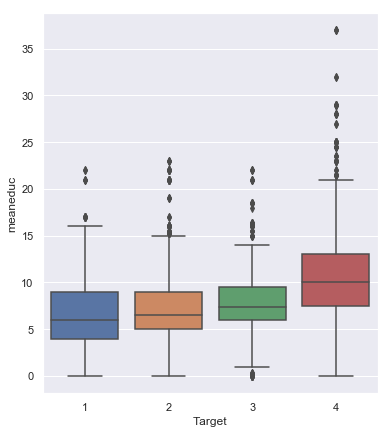

In [628]:
ax = sns.boxplot(x="Target", y="meaneduc", data = costa_train)
#ax = sns.swarmplot(x="Target", y="meaneduc", data= costa_train, color=".25")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

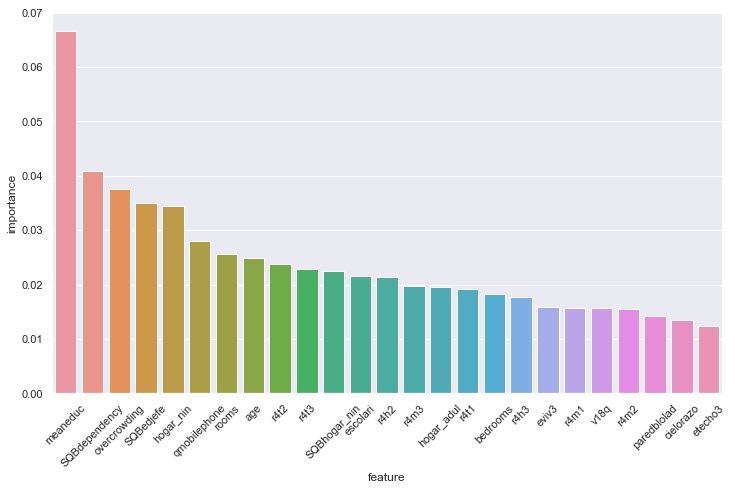

In [629]:

rcParams['figure.figsize'] = 12, 7


sns.barplot(x="feature", y="importance", data = feature_importances.sort_values(by='importance', ascending=False).head(25))
plt.xticks(rotation=45)


### Random Forest with cross validation  (higher performance)

In [630]:


for nfold in range(10, 20, 1): 
    
    costa_rf_cv = RandomForestClassifier()

    # 10 fold cross validation
    cv_score = cross_val_score(costa_rf_cv, X_train, y_train, cv = nfold)

    costa_rf_cv.fit(X_train, y_train)

    y_pred_test_rf = costa_rf_cv.predict(X_test)
    print('nfold = ', nfold, '\n')
    
    print('Confusion matrix \n', confusion_matrix(y_test, y_pred_test_rf), '\n')
    print('Accuracy score', accuracy_score(y_test, y_pred_test_rf))


    print('balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred_test_rf), '\n')

    print('Precision score: ', precision_score(y_test, y_pred_test_rf, average=None))
    print('Recall score :', recall_score(y_test, y_pred_test_rf, average=None))
    print('F1 score :', f1_score(y_test, y_pred_test_rf, average=None), '\n')

    model_accuracies = model_accuracies.append({'model': 'RF-cv-'+str(nfold)+'-nfolds', 
                                            'accuracy': accuracy_score(y_test, y_pred_test_rf),
                                            'mean F1 score': np.mean(f1_score(y_test, y_pred_test_rf, average=None))},ignore_index=True)



nfold =  10 

Confusion matrix 
 [[ 125    2    0   14]
 [   3  280    1   32]
 [   2    9  194   36]
 [   3   13    3 1194]] 

Accuracy score 0.9382522239665096
balanced_accuracy_score:  0.8904790953289886 

Precision score:  [0.93984962 0.92105263 0.97979798 0.93573668]
Recall score : [0.88652482 0.88607595 0.80497925 0.98433636]
F1 score : [0.91240876 0.90322581 0.88382688 0.95942145] 

nfold =  11 

Confusion matrix 
 [[ 114    5    4   18]
 [   2  275    3   36]
 [   1    3  193   44]
 [   3    2    7 1201]] 

Accuracy score 0.9330193615907901
balanced_accuracy_score:  0.8674252126683972 

Precision score:  [0.95       0.96491228 0.93236715 0.92455735]
Recall score : [0.80851064 0.87025316 0.80082988 0.99010717]
F1 score : [0.87356322 0.91514143 0.86160714 0.95621019] 

nfold =  12 

Confusion matrix 
 [[ 121    2    2   16]
 [   2  274    0   40]
 [   2    5  205   29]
 [   2    6    2 1203]] 

Accuracy score 0.9434850863422292
balanced_accuracy_score:  0.8919057548798677 

Preci

In [631]:
model_accuracies

,model,accuracy,mean F1 score
0,RF,0.926217,0.888559
1,RF-cv-10-nfolds,0.938252,0.914721
2,RF-cv-11-nfolds,0.933019,0.901630
3,RF-cv-12-nfolds,0.943485,0.921225
4,RF-cv-13-nfolds,0.942962,0.916961
5,RF-cv-14-nfolds,0.928833,0.899075
6,RF-cv-15-nfolds,0.925693,0.892561
7,RF-cv-16-nfolds,0.929356,0.902977
8,RF-cv-17-nfolds,0.934589,0.902709
9,RF-cv-18-nfolds,0.928310,0.896690


### K-Neighbors (less performant)


Number of neighbors:  1 

Accuracy score:  0.6881214024071167
balanced_accuracy_score:  0.5532314902587394 

Precision score:  [0.52054795 0.48958333 0.4092827  0.80725806]
Recall score : [0.53900709 0.44620253 0.40248963 0.82522671]
F1 score : [0.52961672 0.46688742 0.40585774 0.8161435 ] 

Confusion matrix: 
 [[  76   19   10   36]
 [  28  141   43  104]
 [  10   35   97   99]
 [  32   93   87 1001]] 

Number of neighbors:  3 

Accuracy score:  0.663003663003663
balanced_accuracy_score:  0.4869101202053423 

Precision score:  [0.33484163 0.4095941  0.43548387 0.79382239]
Recall score : [0.5248227  0.35126582 0.22406639 0.84748557]
F1 score : [0.40883978 0.37819421 0.29589041 0.81977671] 

Confusion matrix: 
 [[  74   21    7   39]
 [  51  111   33  121]
 [  34   46   54  107]
 [  62   93   30 1028]] 

Number of neighbors:  5 

Accuracy score:  0.6619570905285191
balanced_accuracy_score:  0.45669129664142977 

Precision score:  [0.4057971  0.39846743 0.34131737 0.77918216]
Recall scor

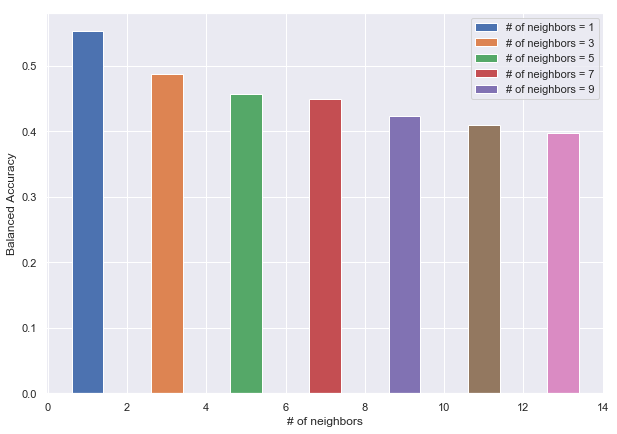

In [632]:
# initialize and fit the model

rcParams['figure.figsize'] = 10, 7

for neighbors in range(1,15,2):
    neighbor_model = KNeighborsClassifier(n_neighbors=neighbors)
    neighbor_model.fit(X_train, y_train) 
    KNeighborsClassifier()

    y_pred_test_kn = neighbor_model.predict(X_test)

    print('Number of neighbors: ', neighbors, '\n')
    print('Accuracy score: ', accuracy_score(y_test, y_pred_test_kn))
    print('balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred_test_kn), '\n')
    
    
    print('Precision score: ', precision_score(y_test, y_pred_test_kn, average=None))
    print('Recall score :', recall_score(y_test, y_pred_test_kn, average=None))
    print('F1 score :', f1_score(y_test, y_pred_test_kn, average=None), '\n')
    
    
    print('Confusion matrix: \n', confusion_matrix(y_test, y_pred_test_kn), '\n')
    
    plt.bar(neighbors, balanced_accuracy_score(y_test, y_pred_test_kn))
    plt.gca().legend((['# of neighbors = ' + str(neighbors) for neighbors in range(1,11,2)]))
    plt.ylabel('Balanced Accuracy')
    plt.xlabel('# of neighbors')
    
    model_accuracies = model_accuracies.append({'model': 'Knn-'+str(neighbors), 
                                            'accuracy': accuracy_score(y_test, y_pred_test_kn),
                                            'mean F1 score': np.mean(f1_score(y_test, y_pred_test_kn, average=None))},ignore_index=True)

    
    

In [633]:
model_accuracies

,model,accuracy,mean F1 score
0,RF,0.926217,0.888559
1,RF-cv-10-nfolds,0.938252,0.914721
2,RF-cv-11-nfolds,0.933019,0.901630
3,RF-cv-12-nfolds,0.943485,0.921225
4,RF-cv-13-nfolds,0.942962,0.916961
5,RF-cv-14-nfolds,0.928833,0.899075
6,RF-cv-15-nfolds,0.925693,0.892561
7,RF-cv-16-nfolds,0.929356,0.902977
8,RF-cv-17-nfolds,0.934589,0.902709
9,RF-cv-18-nfolds,0.928310,0.896690


### Gradient Boosting

In [634]:

costa_gb = GradientBoostingClassifier()

costa_gb.fit(X_train, y_train)
y_pred_test_gb = costa_gb.predict(X_test)

print('Confusion matrix \n', confusion_matrix(y_test, y_pred_test_gb), '\n')
print('Accuracy score', accuracy_score(y_test, y_pred_test_gb))

model_accuracies = model_accuracies.append({'model': 'GradientBoosting', 
                                            'accuracy': accuracy_score(y_test, y_pred_test_gb),
                                            'mean F1 score': np.mean(f1_score(y_test, y_pred_test_gb, average=None))},ignore_index=True)


print('balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred_test_gb), '\n')
accuracy_score(y_test, y_pred_test_gb)


print('Precision score: ', precision_score(y_test, y_pred_test_gb, average=None))
print('Recall score :', recall_score(y_test, y_pred_test_gb, average=None))
print('F1 score :', f1_score(y_test, y_pred_test_gb, average=None), '\n')



Confusion matrix 
 [[  69   23    4   45]
 [   5  161    6  144]
 [   3   30   57  151]
 [   5   31    8 1169]] 

Accuracy score 0.7619047619047619
balanced_accuracy_score:  0.549774048567237 

Precision score:  [0.84146341 0.65714286 0.76       0.77468522]
Recall score : [0.4893617  0.50949367 0.23651452 0.9637263 ]
F1 score : [0.61883408 0.57397504 0.36075949 0.85892726] 



### Gaussian Naive Bayes


In [635]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train)


y_pred_test_gnb = gnb.predict(X_test)

print('Confusion matrix \n', confusion_matrix(y_test, y_pred_test_gnb), '\n')
print('Accuracy score', accuracy_score(y_test, y_pred_test_gnb))

model_accuracies = model_accuracies.append({'model': 'Gaussian Naive Bayes', 
                                            'accuracy': accuracy_score(y_test, y_pred_test_gnb),
                                            'mean F1 score': np.mean(f1_score(y_test, y_pred_test_gnb, average=None))},ignore_index=True)


print('balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred_test_gnb), '\n')

print('Precision score: ', precision_score(y_test, y_pred_test_gnb, average=None))
print('Recall score :', recall_score(y_test, y_pred_test_gnb, average=None))
print('F1 score :', f1_score(y_test, y_pred_test_gnb, average=None), '\n')



Confusion matrix 
 [[ 55   3  80   3]
 [ 56  17 226  17]
 [ 24   4 190  23]
 [ 48  12 652 501]] 

Accuracy score 0.3992673992673993
balanced_accuracy_score:  0.4113189223875983 

Precision score:  [0.30054645 0.47222222 0.16550523 0.92095588]
Recall score : [0.39007092 0.05379747 0.78838174 0.41302556]
F1 score : [0.33950617 0.09659091 0.27357811 0.57029027] 



### RBF SVM

In [636]:
SVM = SVC(gamma=2, C=1)
y_pred = SVM.fit(X_train, y_train)


y_pred_test_SVM = SVM.predict(X_test)

print('Confusion matrix \n', confusion_matrix(y_test, y_pred_test_SVM), '\n')
print('Accuracy score', accuracy_score(y_test, y_pred_test_SVM))


model_accuracies = model_accuracies.append({'model': 'RBF SVM', 
                                            'accuracy': accuracy_score(y_test, y_pred_test_SVM),
                                            'mean F1 score': np.mean(f1_score(y_test, y_pred_test_SVM, average=None))},ignore_index=True)


print('balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred_test_SVM), '\n')

print('Precision score: ', precision_score(y_test, y_pred_test_SVM, average=None))
print('Recall score :', recall_score(y_test, y_pred_test_SVM, average=None))
print('F1 score :', f1_score(y_test, y_pred_test_SVM, average=None), '\n')


Confusion matrix 
 [[   2    0    0  139]
 [   0    2    0  314]
 [   0    0    0  241]
 [   0    0    0 1213]] 

Accuracy score 0.6368393511250654
balanced_accuracy_score:  0.2551283777717928 

Precision score:  [1.         1.         0.         0.63607761]
Recall score : [0.0141844  0.00632911 0.         1.        ]
F1 score : [0.02797203 0.01257862 0.         0.7775641 ] 



In [564]:
"""
MLP = MLPClassifier(alpha=1, max_iter=1000)
y_pred = MLP.fit(X_train, y_train)


y_pred_test_MLP = MLP.predict(X_test)

print('Confusion matrix \n', confusion_matrix(y_test, y_pred_test_MLP), '\n')
print('Accuracy score', accuracy_score(y_test, y_pred_test_MLP))


model_accuracies = model_accuracies.append({'model': 'MLP', 
                                            'accuracy': accuracy_score(y_test, y_pred_test_MLP),
                                            'mean F1 score': np.mean(f1_score(y_test, y_pred_test_MLP, average=None))},ignore_index=True)


print('balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred_test_MLP), '\n')

print('Precision score: ', precision_score(y_test, y_pred_test_MLP, average=None))
print('Recall score :', recall_score(y_test, y_pred_test_MLP, average=None))
print('F1 score :', f1_score(y_test, y_pred_test_MLP, average=None), '\n')
"""

"\nMLP = MLPClassifier(alpha=1, max_iter=1000)\ny_pred = MLP.fit(X_train, y_train)\n\n\ny_pred_test_MLP = MLP.predict(X_test)\n\nprint('Confusion matrix \n', confusion_matrix(y_test, y_pred_test_MLP), '\n')\nprint('Accuracy score', accuracy_score(y_test, y_pred_test_MLP))\n\n\nmodel_accuracies = model_accuracies.append({'model': 'MLP', \n                                            'accuracy': accuracy_score(y_test, y_pred_test_MLP),\n                                            'mean F1 score': np.mean(f1_score(y_test, y_pred_test_MLP, average=None))},ignore_index=True)\n\n\nprint('balanced_accuracy_score: ', balanced_accuracy_score(y_test, y_pred_test_MLP), '\n')\n\nprint('Precision score: ', precision_score(y_test, y_pred_test_MLP, average=None))\nprint('Recall score :', recall_score(y_test, y_pred_test_MLP, average=None))\nprint('F1 score :', f1_score(y_test, y_pred_test_MLP, average=None), '\n')\n"

### Model selection

In [932]:
model_accuracies.sort_values(by = ['mean F1 score'], ascending=False, inplace=True)
model_accuracies

,model,accuracy,mean F1 score
0,RF-cv-12-nfolds,0.943485,0.921225
1,RF-cv-13-nfolds,0.942962,0.916961
2,RF-cv-10-nfolds,0.938252,0.914721
3,RF-cv-19-nfolds,0.935636,0.909869
4,RF-cv-16-nfolds,0.929356,0.902977
5,RF-cv-17-nfolds,0.934589,0.902709
6,RF-cv-11-nfolds,0.933019,0.901630
7,RF-cv-14-nfolds,0.928833,0.899075
8,RF-cv-18-nfolds,0.928310,0.896690
9,RF-cv-15-nfolds,0.925693,0.892561


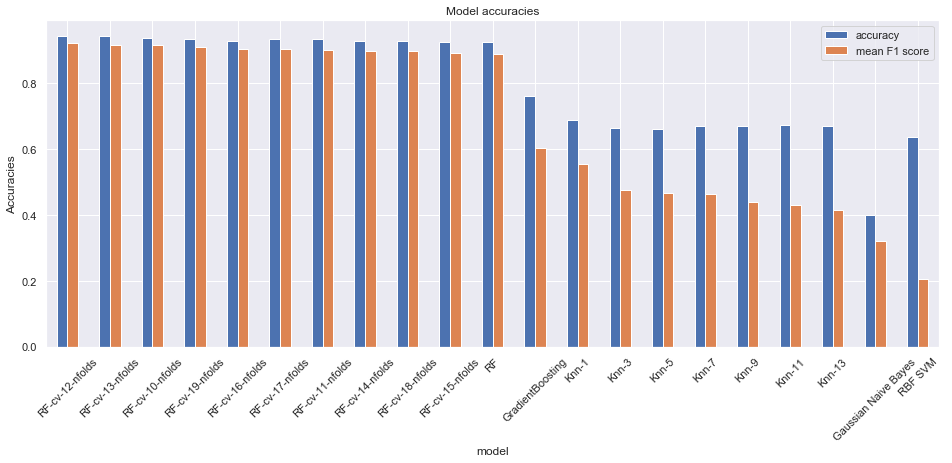

In [933]:
rcParams['figure.figsize'] = 16, 6

#model_accuracies.sort_values(by = ['mean F1 score'], ascending=False, inplace=True)
model_accuracies.set_index('model', inplace = True)
model_accuracies.plot.bar()
plt.title('Model accuracies')
plt.ylabel('Accuracies') 
plt.xticks(rotation=45)

model_accuracies.reset_index(inplace = True)

### Applying cross-validation RF model to predict Test dataset


NB: Submission file 
* This file contains all test IDs and a default value.
* Note that ONLY the heads of household are used in scoring. All household members are included in test + the sample submission, but only heads of households are scored.

In [934]:
costa_test.head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBedjefe,SQBhogar_nin,SQBdependency
0,0,5,0,1,1,0,1,1,2,0,...,0,0,0,0,1,0,4,0,1,0.25
1,0,5,0,1,1,0,1,1,2,0,...,0,0,0,0,1,0,41,0,1,0.25
2,0,5,0,1,1,0,1,1,2,0,...,0,0,0,0,1,0,41,0,1,0.25
3,0,14,0,1,1,1,0,1,1,0,...,0,0,0,0,1,0,59,256,0,0.00
4,0,4,0,1,1,1,0,0,0,0,...,0,0,0,0,1,0,18,0,1,64.00


In [936]:
len(costa_test.dropna())

23825

### Applying model on entire TRAIN set

#### Dropping Na's in X_test  and extracting list of IDs to predict

In [994]:
X_test_with_ID = costa_test.dropna()
len(X_test_with_ID)

23825

In [1121]:
list_ID_test = X_test_with_ID[['idhogar', 'parentesco1']]
print(len(list_ID_test))
list_ID_test.head()

23825


,idhogar,parentesco1
0,72958b30c,0
1,72958b30c,0
2,72958b30c,1
3,5b598fbc9,1
5,8ee7365a8,0


In [1126]:
len(list_ID_test['idhogar'].unique())


7335

#### Dropping IDs of X_test

In [965]:
X_test = X_test_with_ID[[col for col in X_test_with_ID if (col != 'idhogar')]]
len(X_test)

23825

#### Training model on the entire Training set

In [959]:
X = costa_train[[col for col in costa_train if (col != 'Target') & (col != 'idhogar')]]
len(X)

9552

In [960]:
Y = costa_train['Target']
len(Y)

9552

In [961]:
# Init RF model

model_rf_cv = RandomForestClassifier()

# 12 fold cross validation
cv_score = cross_val_score(model_rf_cv, X, y, cv = 12)

model_rf_cv.fit(X, y)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### predicting on X_Test

In [1005]:
y_pred = model_rf_cv.predict(X_test)
print(len(y_pred))

23825


In [1006]:
y_pred[:50]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 1])

#### Merging list of IDs and predictions

In [1007]:
predictions = pd.DataFrame({'ID': list_ID_test['idhogar'], 'parentesco1' : list_ID_test['parentesco1'], 'Target' : y_pred})



In [1015]:
predictions.tail(20)

,ID,parentesco1,Target
23836,e44cb9969,1,2
23837,935a65ffa,0,2
23838,935a65ffa,0,2
23839,935a65ffa,0,2
23840,935a65ffa,0,2
23841,935a65ffa,1,2
23842,935a65ffa,0,2
23843,2edb6f51e,1,4
23844,2edb6f51e,0,4
23845,2edb6f51e,0,4


In [1009]:
# several household members

len(predictions.ID.unique())


7335

### Predictions must be made for one household
If several targets are predicted for one hosuehold, target of household is head household's

In [1117]:
len(predictions.ID.unique())


7335

In [1018]:
result = predictions[['ID', 'Target']][predictions['parentesco1'] == 1]
len(result)

7317

In [1050]:
result.head()

,ID,Target
2,72958b30c,4
3,5b598fbc9,4
6,8ee7365a8,4
8,ff69a6fc8,4
9,b61e2bb92,4


### Some households are missing in the prediction

In [1038]:
groupby = predictions['Target'].groupby([predictions['ID']]).unique()
groupby.index

Index(['000a08204', '000bce7c4', '001845fb0', '003514e22', '003b51a87',
       '003bf2fa9', '004417a6c', '0044a5929', '00498cd58', '004ea2211',
       ...
       'ff8eaf6cf', 'ff91e66fa', 'ff99cc76f', 'ffa90916d', 'ffab93b9f',
       'ffb6d4688', 'ffc1c5fb1', 'ffcdf41de', 'fff6d7a90', 'fffbede04'],
      dtype='object', name='ID', length=7335)

In [1039]:
len(groupby.index)

7335

In [1078]:
groupby.head(15)

ID
000a08204       [4]
000bce7c4    [2, 4]
001845fb0       [4]
003514e22       [4]
003b51a87       [2]
003bf2fa9       [4]
004417a6c       [4]
0044a5929       [4]
00498cd58    [3, 4]
004ea2211       [4]
005411ee8       [2]
00564e3ca    [4, 2]
0065a3821       [2]
008222963       [4]
0082c4eb2       [4]
Name: Target, dtype: object

### Why: Households with no head

In [1072]:
[household for household in predictions['ID'].tolist() if household not in result['ID'].tolist()]

['b59f5b526',
 '9d874b0d6',
 '198fc274a',
 'ce6154327',
 'e3f69768c',
 'df06e01c6',
 'df06e01c6',
 'f6d6fad32',
 '5a667591a',
 '2dc45d484',
 'fc6c8d241',
 'fc6c8d241',
 'e4df1caaf',
 'e4df1caaf',
 'f2fd28dbb',
 'f2fd28dbb',
 'f2fd28dbb',
 'f2fd28dbb',
 'd678c45ad',
 '0e2a3453d',
 '0e2a3453d',
 'b115b4536',
 '91aff0a8e',
 '91aff0a8e',
 '676750a21',
 'd14b3e03a']

In [1150]:
# example:

predictions[predictions['ID']=='f2fd28dbb']

,ID,parentesco1,Target
21654,f2fd28dbb,0,2
21655,f2fd28dbb,0,2
21656,f2fd28dbb,0,2
21657,f2fd28dbb,0,2


In [1151]:
predictions[['ID', 'Target']][predictions['ID']=='f2fd28dbb'].drop_duplicates()

,ID,Target
21654,f2fd28dbb,2


In [1194]:
house_nohead = [household for household in predictions['ID'].tolist() if household not in result['ID'].tolist()]
len(house_nohead)

26

In [1196]:
#predictions['Target'].groupby([predictions['ID']]).unique()
for household in house_nohead:
    print(predictions[predictions['ID'] == household])

              ID  parentesco1  Target
12753  b59f5b526            0       4
              ID  parentesco1  Target
15090  9d874b0d6            0       4
              ID  parentesco1  Target
15544  198fc274a            0       3
              ID  parentesco1  Target
17053  ce6154327            0       4
              ID  parentesco1  Target
17132  e3f69768c            0       2
              ID  parentesco1  Target
17162  df06e01c6            0       4
17163  df06e01c6            0       3
              ID  parentesco1  Target
17162  df06e01c6            0       4
17163  df06e01c6            0       3
              ID  parentesco1  Target
18549  f6d6fad32            0       1
              ID  parentesco1  Target
18643  5a667591a            0       4
              ID  parentesco1  Target
18735  2dc45d484            0       4
              ID  parentesco1  Target
19299  fc6c8d241            0       2
19300  fc6c8d241            0       2
              ID  parentesco1  Target
19299  fc6c8

In [1184]:
len(result_2)

26

In [1185]:
result_2.drop_duplicates()

AttributeError: 'list' object has no attribute 'drop_duplicates'

In [1171]:
for i in range(len(result_2)):
    result.append(result_2[i])

In [1172]:
len(result.ID.unique())

7317

In [1173]:
result[result['ID']=='f2fd28dbb']

,ID,Target


Grid Search

On combine autant de paramètres que de modèles

max depth = [a, b]
n-estimators = [i, j, k]

GridSearchCV

je sélectionne le modèle avec les hyperparamètres qui ont les meilleurs scores sur le TRAIN
puis je l'applique sur le TEST